In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [66]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

(60000, 28, 28)


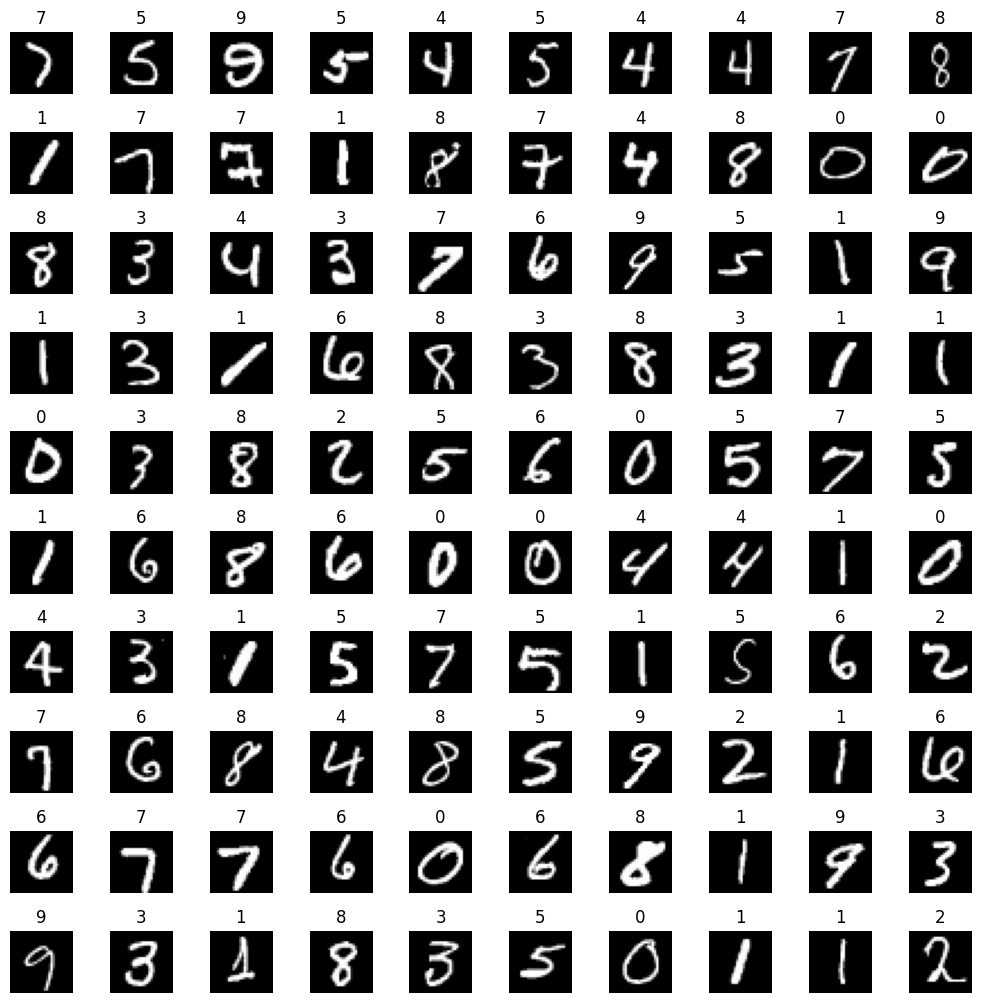

In [67]:
test_length, img_width, img_height = x_train.shape

fig, axs = plt.subplots(10,10, figsize=(10,10))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axs.flat):    
    random_index = np.random.randint(test_length)
    random_x = x_train[random_index]
    random_y = y_train[random_index]
    
    ax.imshow(random_x, cmap='gray')
    ax.set_title(random_y)
    ax.set_axis_off()

In [77]:
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

print(y_train.shape)

(60000,)


In [75]:
model = Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(img_width, img_height,)),
        Dense(units=32, activation='relu'),
        Dense(units=10, activation='softmax'),
    ]
)

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step - loss: 0.2194 - sparse_categorical_accuracy: 0.9439
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - loss: 0.2171 - sparse_categorical_accuracy: 0.9419
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - loss: 0.2000 - sparse_categorical_accuracy: 0.9465
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - loss: 0.2066 - sparse_categorical_accuracy: 0.9458
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - loss: 0.2151 - sparse_categorical_accuracy: 0.9443
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - loss: 0.2100 - sparse_categorical_accuracy: 0.9439
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - loss: 0.1983 - sparse_categorical_accuracy: 0.9462
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - loss: 0.2011 - sparse_categorical_accuracy: 0.9465
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step - loss: 0.1938 - sparse_categorical_accuracy: 0.9483
Epoch 10/20
1875/18

In [82]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.4568 - sparse_categorical_accuracy: 0.9205
Test Accuracy: 0.9293


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

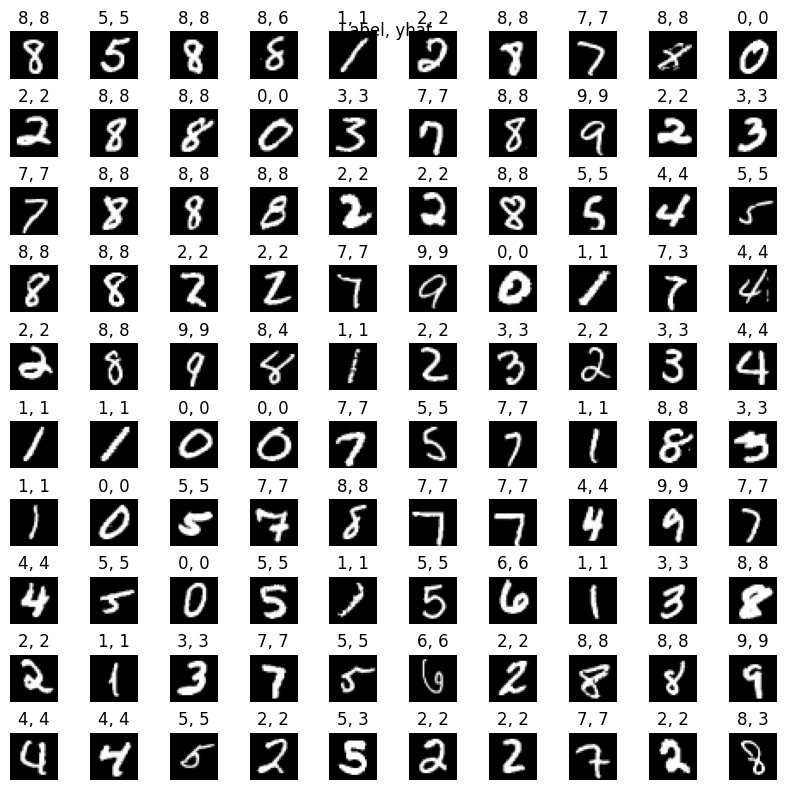

In [92]:
fig, axs = plt.subplots(10, 10, figsize=(8,8))
fig.suptitle("Label, yhat")
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axs.flat):
    random_test_index = np.random.randint(x_test.shape[0])
    random_test_x = x_test[random_test_index]
    random_test_y = y_test[random_test_index]
    
    random_test_x_batch = np.expand_dims(random_test_x, axis=0)
    random_test_prob = model.predict(random_test_x_batch)
    
    predicted_digit = np.argmax(random_test_prob)
    actual_digit = random_test_y 
    
    ax.imshow(random_test_x, cmap='gray')
    ax.set_title(f"{actual_digit}, {predicted_digit}")
    ax.set_axis_off()